# Pymaceuticals Inc.
---

### Analysis

There appeared to be slightly more male than female mice in the experiment.
Over time, the capomulin treatment showed a reduction in tumor volume.
Average tumor volume showed a positive relationship with mouse weight. However, this correlation was not statistically significant according to Pearson's R calculations.
 

In [2]:
# Dependencies and Setup


import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
print(mouse_metadata.head())
print(study_results.head())

combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
                         
# Display the data table for preview
combined_data

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
print(len(combined_data['Mouse ID'].unique()))
print(combined_data['Mouse ID'].nunique())

249
249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = combined_data[combined_data['Mouse ID'].isin(duplicates)==False]
cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(cleaned['Mouse ID'].unique()))
print(cleaned['Mouse ID'].nunique())

248
248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaned['Tumor Volume (mm3)'].groupby(cleaned['Drug Regimen']).mean()
median = cleaned['Tumor Volume (mm3)'].groupby(cleaned['Drug Regimen']).median()
variance = cleaned['Tumor Volume (mm3)'].groupby(cleaned['Drug Regimen']).var()
stdev = cleaned['Tumor Volume (mm3)'].groupby(cleaned['Drug Regimen']).std()
SEM = cleaned['Tumor Volume (mm3)'].groupby(cleaned['Drug Regimen']).sem()

df = pd.DataFrame({
    'mean': mean,
    'median': median,
    'variance': variance,
    'stdev': stdev,
    'sem': SEM
})
df

,mean,median,variance,stdev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: title={'center': 'Count mice for each Drug Regimen'}, xlabel='# of Observed Mouse Timepoints', ylabel='Drug Regimen'>

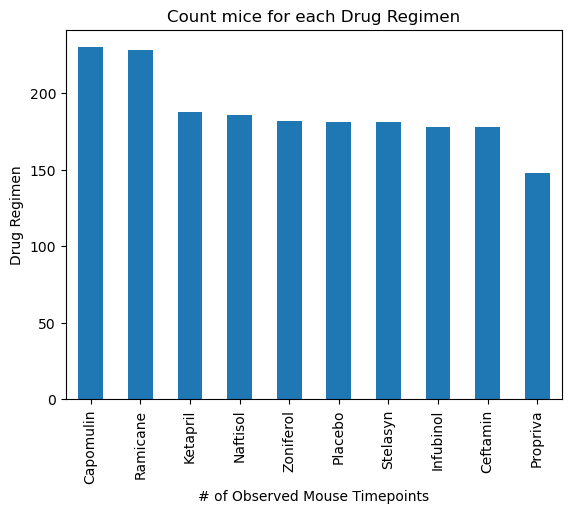

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
graph_df = cleaned[['Timepoint', 'Drug Regimen']]
count = graph_df['Drug Regimen'].value_counts()

count.plot(kind = "bar", xlabel = "# of Observed Mouse Timepoints", ylabel = "Drug Regimen", title = "Count mice for each Drug Regimen")


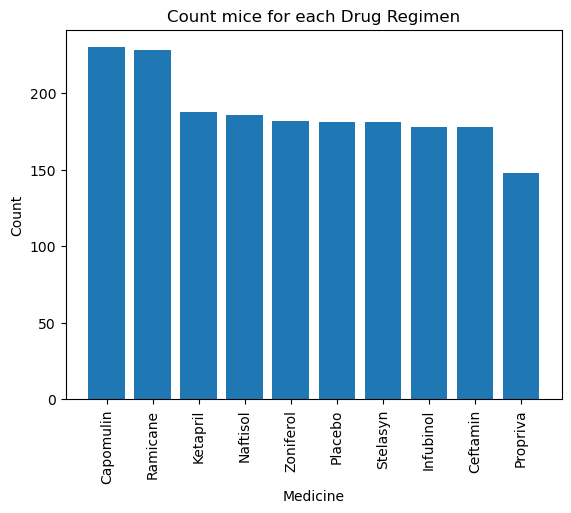

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
dff = cleaned['Drug Regimen'].value_counts()
dff

x = dff.index.values
y = dff.values

plt.bar(x,y)
plt.xlabel("Medicine")
plt.ylabel("Count")
plt.title("Count mice for each Drug Regimen")
plt.xticks(rotation = 90)
plt.show()


<Axes: ylabel='Sex'>

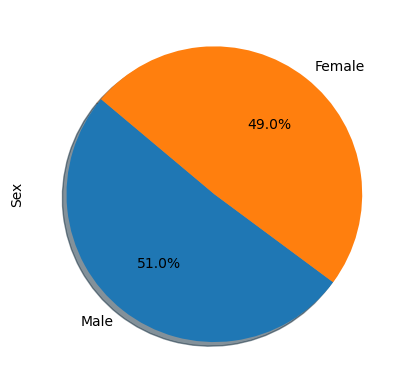

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = cleaned['Sex'].value_counts()

gender.plot(kind="pie", autopct="%1.1f%%", shadow=True, startangle=140)

Text(0, 0.5, 'Sex')

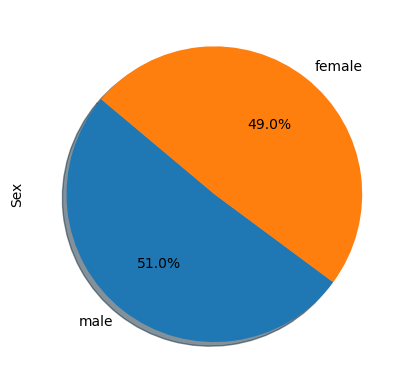

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = "male", "female"
plt.pie(gender,autopct="%1.1f%%", shadow=True, startangle=140, labels = labels)
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin = cleaned.loc[cleaned['Drug Regimen']=="Capomulin",:]
ramicane = cleaned.loc[cleaned['Drug Regimen']== "Ramicane",:]
infubinol = cleaned.loc[cleaned['Drug Regimen']== "Infubinol",:]
ceftamin = cleaned.loc[cleaned['Drug Regimen']=="Ceftamin",:]
# merge1 = pd.merge(capomulin, ramicane, on = "Mouse ID")
# merge2 = pd.merge(merge1, infubinol, on = "Mouse ID")
# merge3 = pd.merge(merge2, ceftamin, on = "Mouse ID")

capomulin_last = capomulin.groupby('Mouse ID').max()['Timepoint']
ramicane_last = ramicane.groupby('Mouse ID').max()['Timepoint']
infubinol_last = infubinol.groupby('Mouse ID').max()['Timepoint']
ceftamin_last = ceftamin.groupby('Mouse ID').max()['Timepoint']

grouped_df = cleaned.groupby("Mouse ID").max()['Timepoint']

merged_df = pd.merge(cleaned, grouped_df, on = ["Mouse ID", "Timepoint"], how = "inner")

merged_df_cap = merged_df.loc[merged_df['Drug Regimen']=='Capomulin']
merged_df_ram = merged_df.loc[merged_df['Drug Regimen']=='Ramicane']
merged_df_inf = merged_df.loc[merged_df['Drug Regimen']=='Infubinol']
merged_df_cef = merged_df.loc[merged_df['Drug Regimen']=='Ceftamin']

capomulin_last

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
i557    45
i738    45
j119    45
j246    35
l509    45
l897    45
m601    45
m957    45
r157    15
r554    45
r944    45
s185    45
s710    45
t565    45
u364    45
v923    45
w150    10
w914    45
x401    45
y793    45
Name: Timepoint, dtype: int64

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# cap_vol = capomulin_last['Tumor Volume (mm3)']
# ram_vol = ramicane_last['Tumor Volume (mm3)']
# inf_vol = infubinol_last['Tumor Volume (mm3)']
# cef_vol = ceftamin_last['Tumor Volume (mm3)']

treatments = [capomulin_last, ramicane_last, infubinol_last, ceftamin_last]
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in regimen:
#     quartiles = merged_df[merged_df['Drug Regimen']==treatment]['Tumor Volume (mm3)'].quantile(.25,.5,.75)
    queried_df = merged_df[merged_df['Drug Regimen']==treatment]['Tumor Volume (mm3)']
    quantile_for_med = queried_df.quantile([.25,.5,.75])
    
    lower = quantile_for_med[0.25]
    upper = quantile_for_med[0.75]
    iqr = upper - lower
    print(f'the iqr for {treatment} is {iqr}')
    
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper +(1.5*iqr)
    print(f"values above {upper_bound} could be outliers")
    print(f"values below {lower_bound} could be outliers")
    
boxplot_df = merged_df[['Drug Regimen', 'Tumor Volume (mm3)']]
boxplot_df.set_index('Drug Regimen')

    


the iqr for Capomulin is 7.781863460000004
values above 51.83201549 could be outliers
values below 20.70456164999999 could be outliers
the iqr for Ramicane is 9.098536719999998
values above 54.30681135 could be outliers
values below 17.912664470000003 could be outliers
the iqr for Infubinol is 11.477135160000003
values above 82.74144559000001 could be outliers
values below 36.83290494999999 could be outliers
the iqr for Ceftamin is 15.577752179999997
values above 87.66645829999999 could be outliers
values below 25.355449580000002 could be outliers


,Tumor Volume (mm3)
Drug Regimen,
Ramicane,22.050126
Capomulin,23.343598
Capomulin,28.484033
Capomulin,28.430964
Ramicane,29.128472
...,...
Stelasyn,45.934712
Propriva,48.710661
Infubinol,62.754451


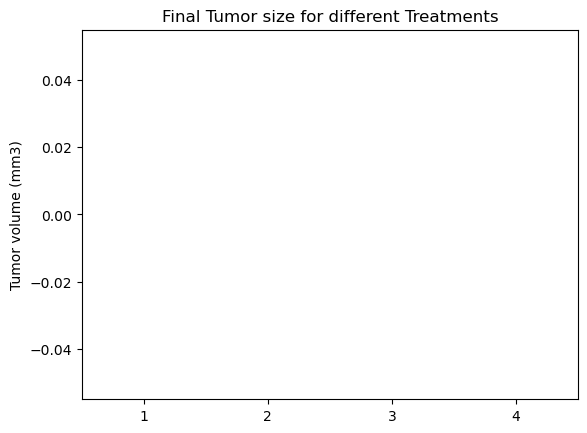

In [17]:
#boxplot data set
boxplot_df = pd.DataFrame({
    'Capomulin': capomulin['Tumor Volume (mm3)'],
    'Ramicane': ramicane['Tumor Volume (mm3)'],
    'Infubinol': infubinol['Tumor Volume (mm3)'],
    'Ceftamin': ceftamin['Tumor Volume (mm3)']
})

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor size for different Treatments")
ax1.set_ylabel("Tumor volume (mm3)")
ax1.boxplot(boxplot_df)
plt.show()

In [22]:
boxplot_df.head(50)

,Capomulin,Ramicane,Infubinol,Ceftamin
0,NaN,45.000000,NaN,NaN
1,NaN,38.825898,NaN,NaN
2,NaN,35.014271,NaN,NaN
3,NaN,34.223992,NaN,NaN
4,NaN,32.997729,NaN,NaN
5,NaN,33.464577,NaN,NaN
6,NaN,31.099498,NaN,NaN
7,NaN,26.546993,NaN,NaN
8,NaN,24.365505,NaN,NaN
9,NaN,22.050126,NaN,NaN


## Line and Scatter Plots

    Tumor Volume (mm3)  Timepoint
10           45.000000          0
11           43.878496          5
12           37.614948         10
13           38.177232         15
14           36.866876         20
15           33.949940         25
16           32.959671         30
17           28.328531         35
18           25.472143         40
19           23.343598         45


Text(0.5, 1.0, 'Tumor volume vs time for Capomulin in Mouse ID s185')

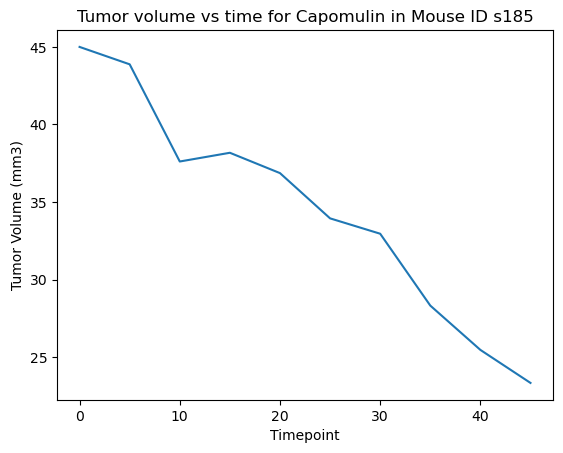

In [108]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
s185_df = cleaned.loc[cleaned['Mouse ID']=='s185']
s185_df = s185_df[['Tumor Volume (mm3)','Timepoint']]
s185_df.set_index('Timepoint')
print(s185_df)
plt.plot(s185_df['Timepoint'], s185_df['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor volume vs time for Capomulin in Mouse ID s185")


C:\Users\navee\AppData\Local\Temp\ipykernel_29140\1701601461.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_cap = capomulin.groupby(['Mouse ID']).mean()


Text(0.5, 1.0, 'Averge tumor volume in mm3 by weight in g')

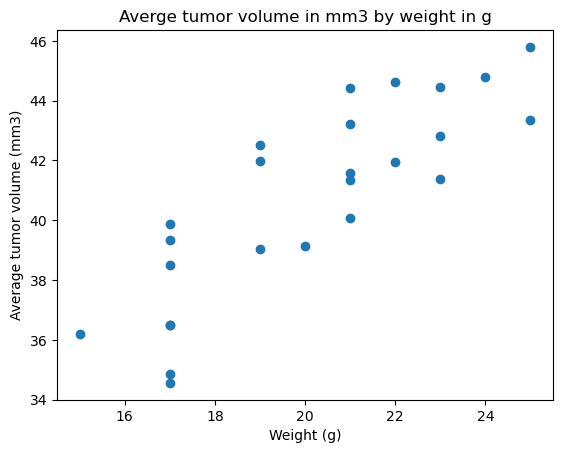

In [117]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = cleaned.loc[cleaned['Drug Regimen']=='Capomulin']
avg_cap = capomulin.groupby(['Mouse ID']).mean()

plt.scatter(avg_cap['Weight (g)'], avg_cap['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average tumor volume (mm3)")
plt.title("Averge tumor volume in mm3 by weight in g")

## Correlation and Regression

In [123]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(avg_cap['Weight (g)'], avg_cap['Tumor Volume (mm3)'])
print(f"the correlation is bt weight and avg tumor volume for entire capomulin regimen is: {corr}")

the correlation is bt weight and avg tumor volume for entire capomulin regimen is: PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)


In [126]:
reg = st.linregress(avg_cap['Weight (g)'], avg_cap['Tumor Volume (mm3)'])
reg
print(f"the linear regression details for mouse weight vs avg tumor volume for capomulin is: {reg}")

the linear regression details for mouse weight vs avg tumor volume for capomulin is: LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)
